# Site loader demo
`SiteLoader` class demonstrations.

Author: Olivier Lamarre  
Affl.: STARS Laboratory, University of Toronto

## Notebook imports and logging setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path
import logging
import logging.config
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import ipynbname
from pathlib import Path

# Logging setup
from gplanetary_nav.dev.paths_config import REPO_CFG as GPLANETARY_CFG
with open(Path(GPLANETARY_CFG.config_dir, 'logging.json')) as f:
    log_cfg = json.load(f)
lfn = Path(GPLANETARY_CFG.logs_dir, ipynbname.name()+'.log')
log_cfg['handlers']['file']['filename'] = lfn
logging.config.dictConfig(log_cfg)
log = logging.getLogger(__name__)
print(f"Logging to {lfn}")

# Plotting setup
plt.rcParams.update({'font.size': 10})


No 'data_dir' param, defaulting to: /home/olamarre/projects/global-planetary-nav/data
No 'logs_dir' param, defaulting to: /home/olamarre/projects/global-planetary-nav/logs
No 'params_dir' param, defaulting to: /home/olamarre/projects/global-planetary-nav/params
No 'config_dir' param, defaulting to: /home/olamarre/projects/global-planetary-nav/config
No 'tests_dir' param, defaulting to: /home/olamarre/projects/global-planetary-nav/tests


Logging to /home/olamarre/projects/global-planetary-nav/logs/05-site_loader_demo.log


## Load site and show metadata

In [2]:
# Site code/configuration name
dirpath = Path(os.environ.get('GNAV_DATASET_PATH'), "JEZ5_sample")

from gplanetary_nav.site.loader import load as site_loader
site = site_loader(dirpath)

2023-06-19 11:25:58,979 - gplanetary_nav.site.loader - INFO - Loading dataset from: /media/starslab/users/olivier-lamarre/data/planetary_maps/JEZ5_sample
2023-06-19 11:25:58,990 - gplanetary_nav.site.loader - INFO - Loading dem
2023-06-19 11:25:59,012 - gplanetary_nav.site.loader - INFO - Loading slope
2023-06-19 11:25:59,016 - gplanetary_nav.site.loader - INFO - Loading aspect
2023-06-19 11:25:59,019 - gplanetary_nav.site.loader - INFO - Loading cfa
2023-06-19 11:25:59,024 - gplanetary_nav.site.loader - INFO - Loading terrain
2023-06-19 11:25:59,028 - gplanetary_nav.site.loader - INFO - Loading nogo_human.tif
2023-06-19 11:25:59,032 - gplanetary_nav.site.loader - INFO - Loading site JEZ5_sample with layers ['dem', 'slope', 'aspect', 'cfa', 'terrain_spoc', 'nogo_human', 'mosaic'] at lat-lon (18.439, -77.503) deg. on reference body: mars
2023-06-19 11:25:59,050 - gplanetary_nav.site.loader - INFO - Dataset JEZ5_sample was loaded


## Site metadata and show all layers

In [3]:
# Show site data
log.info(f"Name: {site.name}")
log.info(f"Reference body: {site.reference_body}")
log.info(f"Latitude, longitude [decimal degrees]: ({site.center_latitude:.3f}, {site.center_longitude:.3f})")
log.info(f"Layer names: {site.layers.keys()}")
log.info(f"Layers dimensions (height, width) [px]: {site.base.shape}")
log.info(f"Resolution [m/px]: {site.resolution_mtr}")
log.info(f"Metric extent with respect to local reference frame (left, right, bottom, top) [m]: {site.extent}")
log.info(f"'Other' layer names: {site.other_layers.keys()}")

2023-06-19 11:26:00,013 - __main__ - INFO - Name: JEZ5_sample
2023-06-19 11:26:00,014 - __main__ - INFO - Reference body: mars
2023-06-19 11:26:00,015 - __main__ - INFO - Latitude, longitude [decimal degrees]: (18.439, -77.503)
2023-06-19 11:26:00,015 - __main__ - INFO - Layer names: dict_keys(['dem', 'slope', 'aspect', 'cfa', 'terrain_spoc', 'nogo_human', 'nogo'])
2023-06-19 11:26:00,016 - __main__ - INFO - Layers dimensions (height, width) [px]: (202, 233)
2023-06-19 11:26:00,017 - __main__ - INFO - Resolution [m/px]: 5.0
2023-06-19 11:26:00,018 - __main__ - INFO - Metric extent with respect to local reference frame (left, right, bottom, top) [m]: (4587464.711, 4588629.711, 1093825.4316, 1094835.4316)
2023-06-19 11:26:00,019 - __main__ - INFO - 'Other' layer names: dict_keys(['mosaic'])


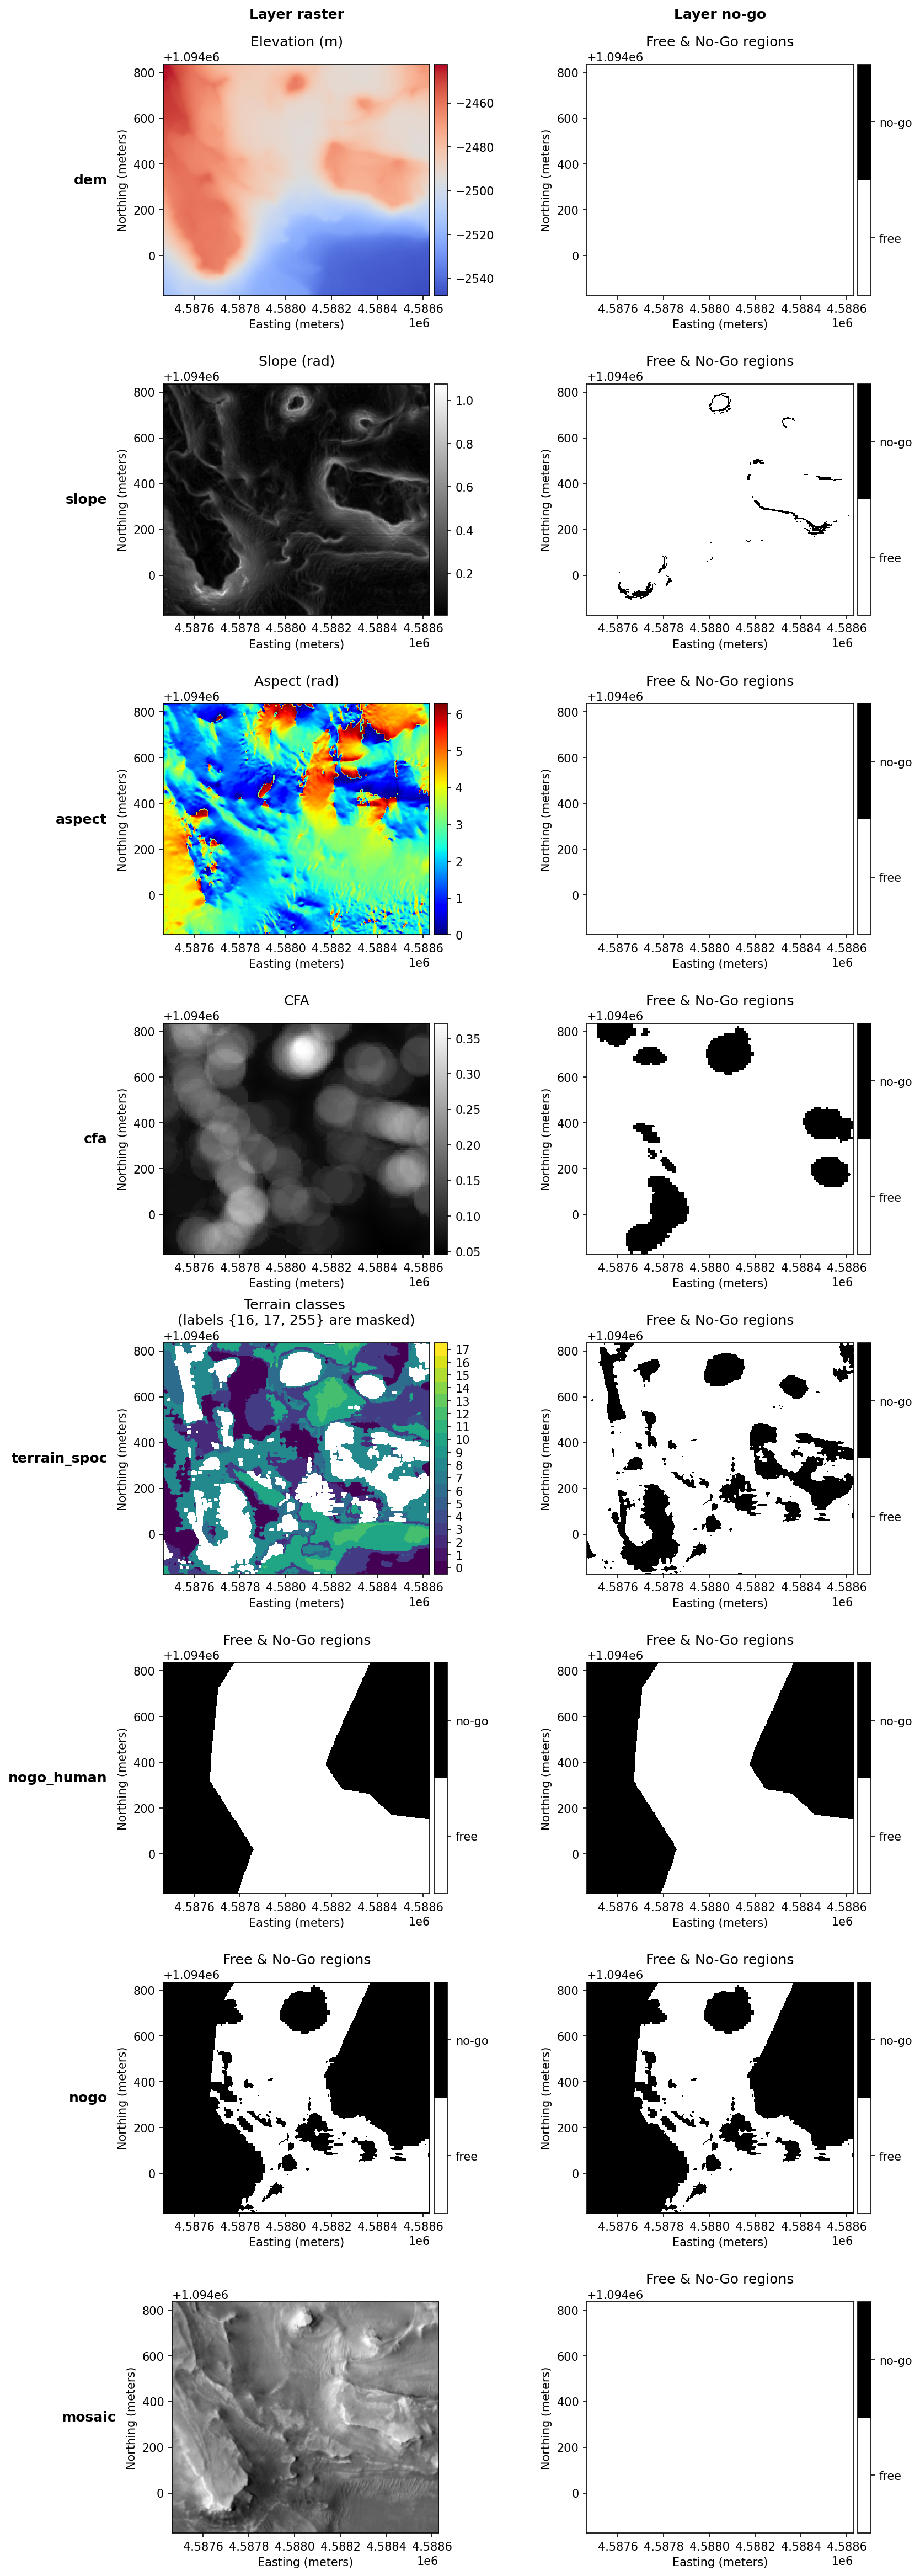

In [4]:
# Plot standard and 'other' layers
site.plot_all()
# plt.savefig("/tmp/layers.png", dpi=75, bbox_inches="tight")

## Access individual layers

In [5]:
# Where layer instances of specific types are stored
site.layers.keys()

dict_keys(['dem', 'slope', 'aspect', 'cfa', 'terrain_spoc', 'nogo_human', 'nogo'])

In [6]:
# "Other" (generic) layer instances are stored here
site.other_layers.keys()

dict_keys(['mosaic'])

In [7]:
# Access the raster or no-go map of a specific layer instance (as numpy arrays)
slope_raster = site.layers['slope'].get_raster()
slope_nogo = site.layers['slope'].get_nogo()

In [8]:
# Shortcuts for raster data of layers of specific types (dem, slope, aspect, cfa, terrain, nogo)
# are implemented as site attributes
slope_raster = site.slope
cfa_raster = site.cfa

<AxesSubplot:title={'center':'Slope (rad)'}, xlabel='Easting (meters)', ylabel='Northing (meters)'>

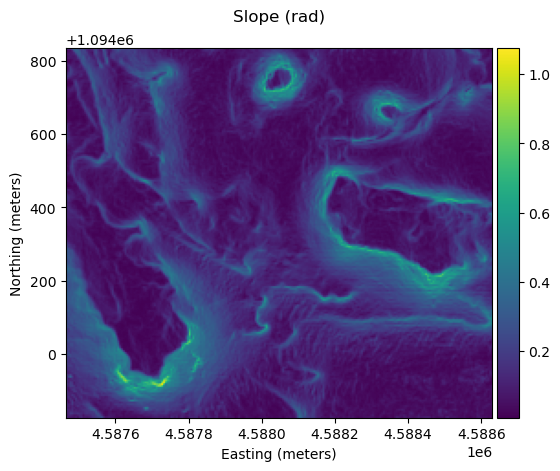

In [9]:
# Default plot of a raster of a single layer
fig, ax = plt.subplots()
site.layers['slope'].plot(ax)

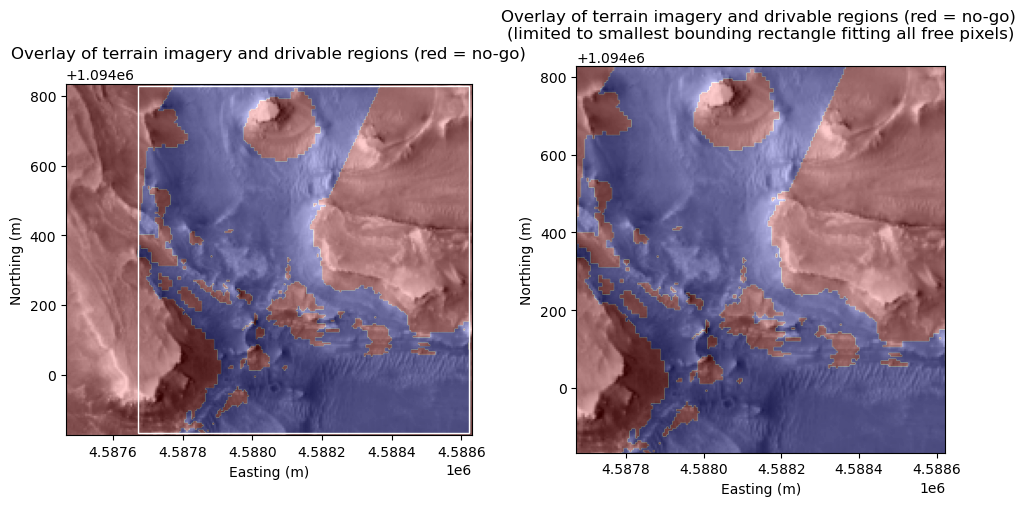

In [10]:
# Manual plotting of layers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), squeeze=False)

# Plot 1: Map with smallest bounding rectangle that includes all free pixels
ax = axes[0,0]

ax.imshow(
    site.other_layers['mosaic'].get_raster(), # Show the terrain imagery
    cmap='gray',
    extent = site.extent, # the plotting extent of all layers
    zorder=0)

ax.imshow(
    site.nogo,
    cmap='bwr',
    alpha=0.2,
    extent = site.extent,
    zorder=1)

ax = site.plot_roi_rectangle(ax)

ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.set_title("Overlay of terrain imagery and drivable regions (red = no-go)", y=1.05)


# Plot 2: Limiting the plot to the smallest rectangle fitting all free pixels

ax = axes[0,1]

ax.imshow(
    site.other_layers['mosaic'].get_raster(), # Show the terrain imagery
    cmap='gray',
    extent = site.extent, # the plotting extent of all layers
    zorder=0)

ax.imshow(
    site.nogo, # Show the terrain imagery
    cmap='bwr',
    alpha=0.2,
    extent = site.extent, # the plotting extent of all layers
    zorder=1)

ax.set_xlim(*site.roi_UTM_xlim)
ax.set_ylim(*site.roi_UTM_ylim)

ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.set_title("Overlay of terrain imagery and drivable regions (red = no-go) \n(limited to smallest bounding rectangle fitting all free pixels)", y=1.05)
plt.tight_layout()

## Conversion between grid coordinates and UTM coordinates

In [11]:
# Easting, Northing (m) of the center of grid cell (10,5)
site.UTM_from_grid((10,5))

(4587492.211, 1094782.9316)

In [12]:
# Grid coordinate closest to UTM coords (4587492.211, 1094782.9316)
site.grid_from_UTM(easting=4587492.211, northing=1094782.9316)

(10, 5)

## Other functionalities

In [13]:
# Set of all free pixel grid coordinates (i.e. all locations not in no-go)
site.valid_coords

{(185, 101),
 (5, 178),
 (104, 115),
 (67, 137),
 (133, 175),
 (119, 90),
 (66, 66),
 (156, 192),
 (15, 143),
 (8, 87),
 (146, 189),
 (95, 98),
 (169, 228),
 (189, 106),
 (122, 63),
 (108, 126),
 (71, 138),
 (94, 57),
 (179, 221),
 (121, 110),
 (84, 102),
 (107, 79),
 (70, 81),
 (144, 211),
 (3, 152),
 (192, 207),
 (12, 90),
 (97, 70),
 (150, 200),
 (16, 172),
 (177, 127),
 (186, 135),
 (59, 127),
 (82, 52),
 (45, 64),
 (135, 194),
 (183, 214),
 (125, 99),
 (72, 113),
 (148, 174),
 (81, 133),
 (7, 149),
 (196, 210),
 (152, 88),
 (101, 91),
 (161, 158),
 (190, 146),
 (63, 96),
 (56, 146),
 (171, 195),
 (194, 96),
 (113, 112),
 (76, 124),
 (62, 59),
 (136, 185),
 (184, 165),
 (4, 112),
 (156, 91),
 (89, 104),
 (142, 226),
 (165, 131),
 (88, 95),
 (51, 85),
 (178, 225),
 (175, 188),
 (198, 119),
 (64, 119),
 (50, 54),
 (188, 168),
 (174, 111),
 (93, 101),
 (187, 81),
 (173, 94),
 (92, 82),
 (55, 94),
 (182, 212),
 (48, 136),
 (200, 83),
 (163, 169),
 (96, 132),
 (149, 134),
 (105, 90),
 (

In [14]:
# Check if a pixel grid coordinate is no-go
site.in_nogo((1,1))

True

In [15]:
# Given a list of grid coordinates, return the corresponding layer values formatted as a Pandas DataFrame
grid_coords = [(1,1), (153,10), (200,102), (55,70)]
site.value_from_grid_coordinates(grid_coords)

,DEM_m,SLOPE_rad,ASPECT_rad,CFA,TERRAIN_SPOC,NOGO_HUMAN,NOGO
0,-2442.357666,0.042670,0.194325,0.1297,8.0,1.0,1.0
1,-2480.792725,0.314082,4.064345,0.0663,0.0,1.0,1.0
2,-2523.914062,0.036011,2.713018,0.0663,3.0,0.0,0.0
3,-2487.711914,0.050095,1.321765,0.0771,0.0,0.0,0.0


In [16]:
# Same, but using UTM coordinates
utm_coords = np.array([site.UTM_from_grid(n) for n in grid_coords])
site.value_from_UTM_coordinates(utm_coords)

,DEM_m,SLOPE_rad,ASPECT_rad,CFA,TERRAIN_SPOC,NOGO_HUMAN,NOGO
0,-2442.357666,0.042670,0.194325,0.1297,8.0,1.0,1.0
1,-2480.792725,0.314082,4.064345,0.0663,0.0,1.0,1.0
2,-2523.914062,0.036011,2.713018,0.0663,3.0,0.0,0.0
3,-2487.711914,0.050095,1.321765,0.0771,0.0,0.0,0.0


In [17]:
# Layer names and their units
site.layers_with_units

{'dem': 'm',
 'slope': 'rad',
 'aspect': 'rad',
 'cfa': None,
 'terrain_spoc': None,
 'nogo_human': None,
 'nogo': None}

## No-go map parameters

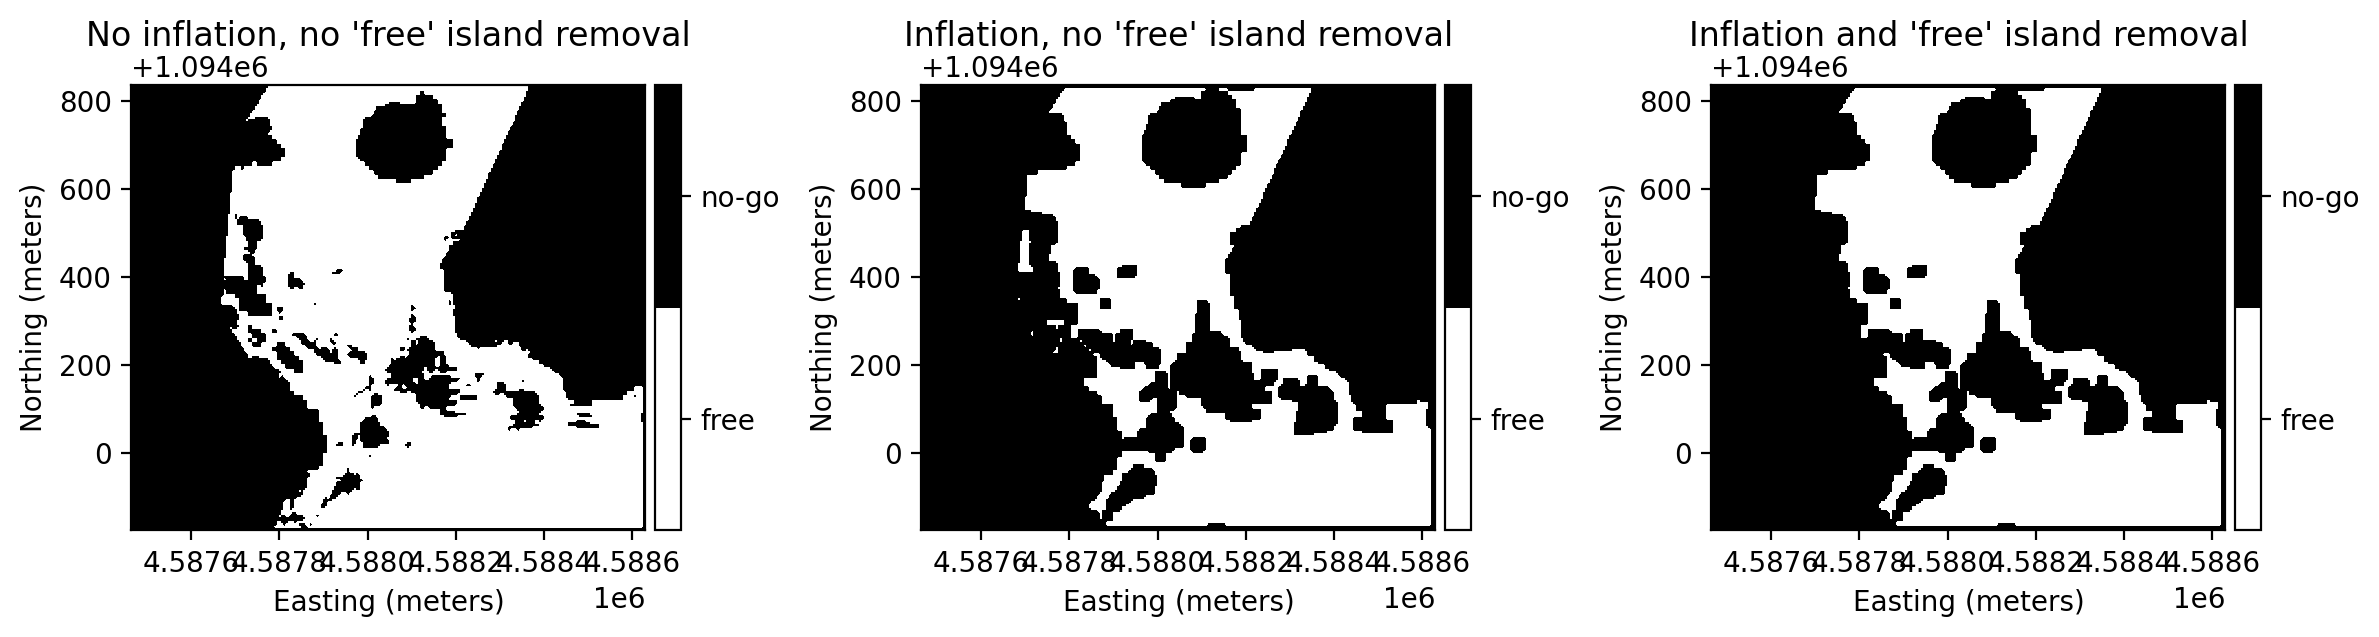

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12,5), dpi=200)

# Show elevation & no-go maps, top view
site.nogo_kernel = None
site.free_island_is_nogo = False
site.combine_nogo()
ax = site.layers['nogo'].plot(axes[0])
ax.set_title("No inflation, no 'free' island removal", y=1.05)

site.set_nogo_inflation(3)
ax = site.layers['nogo'].plot(axes[1])
ax.set_title("Inflation, no 'free' island removal", y=1.05)

site.free_island_is_nogo = True
site.combine_nogo()
ax = site.layers['nogo'].plot(axes[2])
ax.set_title("Inflation and 'free' island removal", y=1.05)


plt.tight_layout()
# plt.savefig("/tmp/nogo_processing.png", dpi=75, bbox_inches="tight")